- 참고 

    - concat한 피클 -> nowonstation.pickle
    - 최종 결과물 -> final_nowon.pickle 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime

In [2]:
gu = ['종로구', '노원구']
path = 'C:/Users/user/Finance/bigcon/데이터/환경기상데이터/' 
colnames = ['pm10', 'pm25']

In [3]:
#노원구
nowon_mno = []
#파일 이름을 불러온다
for root, dirs, files in os.walk(path+gu[1]):
    for file in files:
        nowon_mno.append(file)

print(nowon_mno)

['V10O1610102.csv', 'V10O1610200.csv', 'V10O1610293.csv', 'V10O1610297.csv', 'V10O1610312.csv', 'V10O1610351.csv', 'V10O1610356.csv', 'V10O1610376.csv', 'V10O1610610.csv', 'V10O1610616.csv', 'V10O1610629.csv', 'V10O1610630.csv', 'V10O1610642.csv', 'V10O1610643.csv', 'V10O1611097.csv', 'V10O1611100.csv', 'V10O1611102.csv', 'V10O1611104.csv', 'V10O1611150.csv', 'V10O1611229.csv', 'V10O1611652.csv', 'V10O1612126.csv']


In [4]:
# concat한 pickle 불러오기
nowonstation = pd.read_pickle("./nowonstation.pickle")
nowonstation

serial                    V10O1610102  V10O1610200  V10O1610293  V10O1610297  \
tm                                                                             
2018-04-01 00:00:00 pm10          NaN         80.0         67.0         53.0   
                    pm25          NaN         48.0         40.0         32.0   
2018-04-01 00:01:00 pm10          NaN         74.0         61.0         66.0   
                    pm25          NaN         45.0         37.0         40.0   
2018-04-01 00:02:00 pm10          NaN         69.0         56.0         68.0   
...                               ...          ...          ...          ...   
2019-03-31 23:57:00 pm25         14.0          NaN         26.0          NaN   
2019-03-31 23:58:00 pm10         31.0          NaN         37.0          NaN   
                    pm25         20.0          NaN         24.0          NaN   
2019-03-31 23:59:00 pm10         45.0          NaN         38.0          NaN   
                    pm25         30.0          NaN         25.0          NaN   

serial                    V10O1610312  V10O1610351  V10O1610356  V10O1610376  \
tm                                                                             
2018-04-01 00:00:00 pm10          NaN          NaN         26.0         59.0   
                    pm25          NaN          NaN         10.0         35.0   
2018-04-01 00:01:00 pm10          NaN          NaN         30.0         63.0   
                    pm25          NaN          NaN         12.0         38.0   
2018-04-01 00:02:00 pm10          NaN          NaN         32.0         55.0   
...                               ...          ...          ...          ...   
2019-03-31 23:57:00 pm25         21.0         20.0         21.0         19.0   
2019-03-31 23:58:00 pm10         14.0         19.0         30.0         34.0   
                    pm25          9.0         12.0         20.0         22.0   
2019-03-31 23:59:00 pm10         27.0         37.0         34.0         29.0   
                    pm25         18.0         24.0         23.0         19.0   

serial                    V10O1610610  V10O1610616  ...  V10O1610642  \
tm                                                  ...                
2018-04-01 00:00:00 pm10         39.0         54.0  ...         41.0   
                    pm25         19.0         32.0  ...         20.0   
2018-04-01 00:01:00 pm10         37.0         74.0  ...         42.0   
                    pm25         18.0         45.0  ...         21.0   
2018-04-01 00:02:00 pm10         40.0         77.0  ...         38.0   
...                               ...          ...  ...          ...   
2019-03-31 23:57:00 pm25          NaN         28.0  ...         24.0   
2019-03-31 23:58:00 pm10          NaN         30.0  ...         29.0   
                    pm25          NaN         20.0  ...         19.0   
2019-03-31 23:59:00 pm10          NaN         24.0  ...         28.0   
                    pm25          NaN         16.0  ...         18.0   

serial                    V10O1610643  V10O1611097  V10O1611100  V10O1611102  \
tm                                                                             
2018-04-01 00:00:00 pm10         27.0        102.0        114.0         58.0   
                    pm25         13.0         62.0         69.0         35.0   
2018-04-01 00:01:00 pm10         29.0         78.0         94.0         51.0   
                    pm25         14.0         47.0         57.0         31.0   
2018-04-01 00:02:00 pm10         27.0         56.0         84.0         61.0   
...                               ...          ...          ...          ...   
2019-03-31 23:57:00 pm25         26.0         21.0         18.0         17.0   
2019-03-31 23:58:00 pm10         26.0         33.0         19.0         27.0   
                    pm25         17.0         22.0         12.0         18.0   
2019-03-31 23:59:00 pm10         16.0         24.0         17.0         25.0   
                    p

In [5]:
#tm --> 날짜 / 시간 split 
nowonstation = nowonstation.reset_index()
nowonstation['tm'] = pd.to_datetime(nowonstation.tm, format="%Y%m%d%H%M")
nowonstation = nowonstation.rename(columns={'level_1':'pm'})

nowonstation['date'] = pd.to_datetime(nowonstation['tm']).dt.date
nowonstation['time'] = pd.to_datetime(nowonstation['tm']).dt.time
nowonstation = nowonstation.set_index(['date', 'time', 'pm'])
nowonstation

serial                                    tm  V10O1610102  V10O1610200  \
date       time     pm                                                   
2018-04-01 00:00:00 pm10 2018-04-01 00:00:00          NaN         80.0   
                    pm25 2018-04-01 00:00:00          NaN         48.0   
           00:01:00 pm10 2018-04-01 00:01:00          NaN         74.0   
                    pm25 2018-04-01 00:01:00          NaN         45.0   
           00:02:00 pm10 2018-04-01 00:02:00          NaN         69.0   
...                                      ...          ...          ...   
2019-03-31 23:57:00 pm25 2019-03-31 23:57:00         14.0          NaN   
           23:58:00 pm10 2019-03-31 23:58:00         31.0          NaN   
                    pm25 2019-03-31 23:58:00         20.0          NaN   
           23:59:00 pm10 2019-03-31 23:59:00         45.0          NaN   
                    pm25 2019-03-31 23:59:00         30.0          NaN   

serial                    V10O1610293  V10O1610297  V10O1610312  V10O1610351  \
date       time     pm                                                         
2018-04-01 00:00:00 pm10         67.0         53.0          NaN          NaN   
                    pm25         40.0         32.0          NaN          NaN   
           00:01:00 pm10         61.0         66.0          NaN          NaN   
                    pm25         37.0         40.0          NaN          NaN   
           00:02:00 pm10         56.0         68.0          NaN          NaN   
...                               ...          ...          ...          ...   
2019-03-31 23:57:00 pm25         26.0          NaN         21.0         20.0   
           23:58:00 pm10         37.0          NaN         14.0         19.0   
                    pm25         24.0          NaN          9.0         12.0   
           23:59:00 pm10         38.0          NaN         27.0         37.0   
                    pm25         25.0          NaN         18.0         24.0   

serial                    V10O1610356  V10O1610376  V10O1610610  ...  \
date       time     pm                                           ...   
2018-04-01 00:00:00 pm10         26.0         59.0         39.0  ...   
                    pm25         10.0         35.0         19.0  ...   
           00:01:00 pm10         30.0         63.0         37.0  ...   
                    pm25         12.0         38.0         18.0  ...   
           00:02:00 pm10         32.0         55.0         40.0  ...   
...                               ...          ...          ...  ...   
2019-03-31 23:57:00 pm25         21.0         19.0          NaN  ...   
           23:58:00 pm10         30.0         34.0          NaN  ...   
                    pm25         20.0         22.0          NaN  ...   
           23:59:00 pm10         34.0         29.0          NaN  ...   
                    pm25         23.0         19.0          NaN  ...   

serial                    V10O1610642  V10O1610643  V10O1611097  V10O1611100  \
date       time     pm                                                         
2018-04-01 00:00:00 pm10         41.0         27.0        102.0        114.0   
                    pm25         20.0         13.0         62.0         69.0   
           00:01:00 pm10         42.0         29.0         78.0         94.0   
                    pm25         21.0         14.0         47.0         57.0   
           00:02:00 pm10         38.0         27.0         56.0         84.0   
...                               ...          ...          ...          ...   
2019-03-31 23:57:00 pm25         24.0         26.0         21.0         18.0   
           23:58:00 pm10         29.0         26.0         33.0         19.0   
                    pm25         19.0         17.0         22.0         12.0   
           23:59:00 pm10         28.0         16.0         24.0         17.0   
                    pm25         18.0         10.0         16.0         11.0   

serial            

1. 활동 시간(체감시간) 적용 -> 05:00~ 23:59 

In [6]:
nowonstation = nowonstation.reset_index()
nowonstation = nowonstation[nowonstation.time > datetime.time(4, 59)]
nowonstation = nowonstation.set_index(['tm','date', 'time', 'pm'])
nowonstation.tail()

serial                                        V10O1610102  V10O1610200  \
tm                  date       time     pm                               
2019-03-31 23:57:00 2019-03-31 23:57:00 pm25         14.0          NaN   
2019-03-31 23:58:00 2019-03-31 23:58:00 pm10         31.0          NaN   
                                        pm25         20.0          NaN   
2019-03-31 23:59:00 2019-03-31 23:59:00 pm10         45.0          NaN   
                                        pm25         30.0          NaN   

serial                                        V10O1610293  V10O1610297  \
tm                  date       time     pm                               
2019-03-31 23:57:00 2019-03-31 23:57:00 pm25         26.0          NaN   
2019-03-31 23:58:00 2019-03-31 23:58:00 pm10         37.0          NaN   
                                        pm25         24.0          NaN   
2019-03-31 23:59:00 2019-03-31 23:59:00 pm10         38.0          NaN   
                                        pm25         25.0          NaN   

serial                                        V10O1610312  V10O1610351  \
tm                  date       time     pm                               
2019-03-31 23:57:00 2019-03-31 23:57:00 pm25         21.0         20.0   
2019-03-31 23:58:00 2019-03-31 23:58:00 pm10         14.0         19.0   
                                        pm25          9.0         12.0   
2019-03-31 23:59:00 2019-03-31 23:59:00 pm10         27.0         37.0   
                                        pm25         18.0         24.0   

serial                                        V10O1610356  V10O1610376  \
tm                  date       time     pm                               
2019-03-31 23:57:00 2019-03-31 23:57:00 pm25         21.0         19.0   
2019-03-31 23:58:00 2019-03-31 23:58:00 pm10         30.0         34.0   
                                        pm25         20.0         22.0   
2019-03-31 23:59:00 2019-03-31 23:59:00 pm10         34.0         29.0   
                                        pm25         23.0         19.0   

serial                                        V10O1610610  V10O1610616  ...  \
tm                  date       time     pm                              ...   
2019-03-31 23:57:00 2019-03-31 23:57:00 pm25          NaN         28.0  ...   
2019-03-31 23:58:00 2019-03-31 23:58:00 pm10          NaN         30.0  ...   
                                        pm25          NaN         20.0  ...   
2019-03-31 23:59:00 2019-03-31 23:59:00 pm10          NaN         24.0  ...   
                                        pm25          NaN         16.0  ...   

serial                                        V10O1610642  V10O1610643  \
tm                  date       time     pm                               
2019-03-31 23:57:00 2019-03-31 23:57:00 pm25         24.0         26.0   
2019-03-31 23:58:00 2019-03-31 23:58:00 pm10         29.0         26.0   
                                        pm25         19.0         17.0   
2019-03-31 23:59:00 2019-03-31 23:59:00 pm10         28.0         16.0   
                                        pm25         18.0         10.0   

serial                                        V10O1611097  V10O1611100  \
tm                  date       time     pm                               
2019-03-31 23:57:00 2019-03-31 23:57:00 pm25         21.0         18.0   
2019-03-31 23:58:00 2019-03-31 23:58:00 pm10         33.0         19.0   
                                        pm25         22.0         12.0   
2019-03-31 23:59:00 2019-03-31 23:59:00 pm10         24.0         17.0   
                                        pm25         16.0         11.0   

serial                                        V10O1611102  V10O1611104  \
tm                  date       time     pm                               
2019-03-31 23:57:00 2019-03-31 23:57:00 pm25         17.0         22.0   
2019-03-31 23:58:00 2019-03-31 23:58:00 pm10         27.0         27.0   
                                    

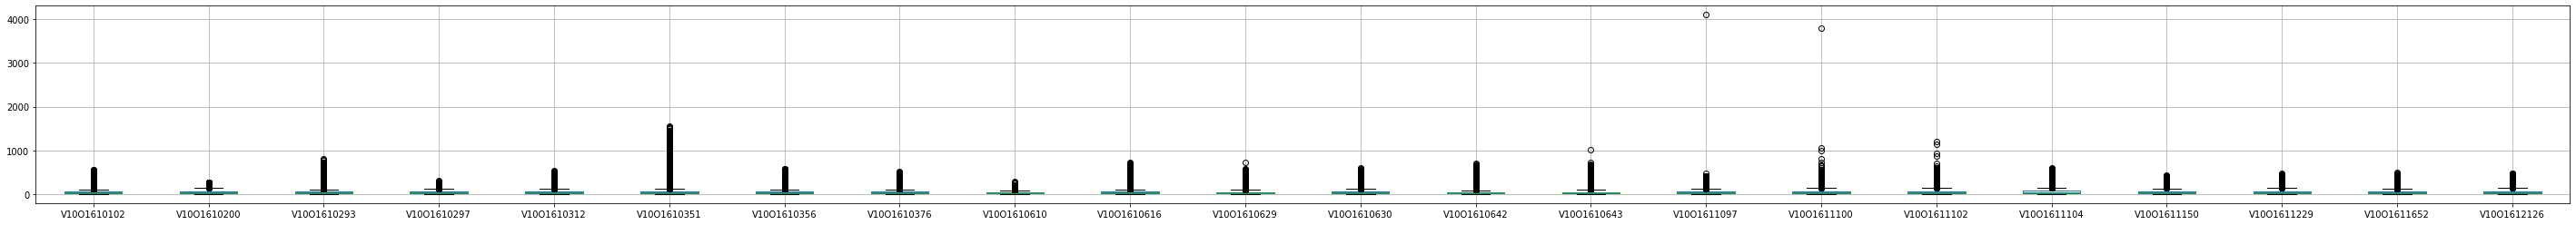

In [7]:
# 이상치 확인 
%matplotlib inline
import matplotlib.pylab as plt

plt.rcParams["figure.figsize"] = (50,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 
nowonstation.boxplot()

In [8]:
nowonstation= nowonstation.reset_index()
nowonstation

serial,tm,date,time,pm,V10O1610102,V10O1610200,V10O1610293,V10O1610297,V10O1610312,V10O1610351,...,V10O1610642,V10O1610643,V10O1611097,V10O1611100,V10O1611102,V10O1611104,V10O1611150,V10O1611229,V10O1611652,V10O1612126
0,2018-04-01 05:00:00,2018-04-01,05:00:00,pm10,NaN,60.0,62.0,66.0,49.0,NaN,...,42.0,27.0,66.0,51.0,56.0,78.0,75.0,61.0,56.0,70.0
1,2018-04-01 05:00:00,2018-04-01,05:00:00,pm25,NaN,34.0,35.0,38.0,24.0,NaN,...,21.0,13.0,38.0,29.0,32.0,45.0,43.0,34.0,32.0,35.0
2,2018-04-01 05:01:00,2018-04-01,05:01:00,pm10,NaN,63.0,62.0,72.0,54.0,NaN,...,34.0,21.0,55.0,97.0,65.0,79.0,57.0,39.0,29.0,1.0
3,2018-04-01 05:01:00,2018-04-01,05:01:00,pm25,NaN,36.0,35.0,41.0,27.0,NaN,...,17.0,10.0,31.0,56.0,37.0,45.0,33.0,22.0,16.0,1.0
4,2018-04-01 05:02:00,2018-04-01,05:02:00,pm10,NaN,49.0,56.0,64.0,59.0,NaN,...,36.0,23.0,41.0,33.0,54.0,58.0,74.0,51.0,49.0,71.0
5,2018-04-01 05:02:00,2018-04-01,05:02:00,pm25,NaN,28.0,32.0,37.0,30.0,NaN,...,18.0,11.0,23.0,19.0,31.0,33.0,42.0,29.0,28.0,36.0
6,2018-04-01 05:03:00,2018-04-01,05:03:00,pm10,NaN,73.0,59.0,72.0,59.0,NaN,...,39.0,28.0,40.0,44.0,64.0,85.0,67.0,62.0,57.0,60.0
7,2018-04-01 05:03:00,2018-04-01,05:03:00,pm25,NaN,42.0,34.0,41.0,30.0,NaN,...,19.0,14.0,23.0,25.0,37.0,49.0,38.0,35.0,33.0,30.0
8,2018-04-01 05:04:00,2018-04-01,05:04:00,pm10,NaN,72.0,59.0,68.0,69.0,NaN,...,41.0,32.0,65.0,50.0,29.0,59.0,63.0,63.0,37.0,76.0
9,2018-04-01 05:04:00,2018-04-01,05:04:00,pm25,NaN,41.0,34.0,39.0,35.0,NaN,...,20.0,16.0,37.0,28.0,16.0,34.0,36.0,35.0,21.0,38.0


In [9]:
#이상치 처리 (1분전과 1분후의 중간값으로 바꿔줌)
print(nowonstation['V10O1611097'].max(),'->', end="")
i = nowonstation['V10O1611097'].idxmax()
nowonstation['V10O1611097'][i] = round((nowonstation['V10O1611097'][i-2]+
                                   nowonstation['V10O1611097'][i+2])/2)
print(nowonstation['V10O1611097'][i])
#####################
print(nowonstation['V10O1611100'].max(),'->', end="")
i = nowonstation['V10O1611100'].idxmax()
nowonstation['V10O1611100'][i] = round((nowonstation['V10O1611100'][i-2]+
                                   nowonstation['V10O1611100'][i+2])/2)
print(nowonstation['V10O1611100'][i])
####################
print(nowonstation['V10O1611100'].max(),'->', end="")
i = nowonstation['V10O1611100'].idxmax()
nowonstation['V10O1611100'][i] = round((nowonstation['V10O1611100'][i-2]+
                                   nowonstation['V10O1611100'][i+2])/2)
print(nowonstation['V10O1611100'][i])

4104.0 ->14.0
3803.0 ->14.0
1057.0 ->66.0


C:\Users\user\Anaconda3\envs\finance\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\user\Anaconda3\envs\finance\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\user\Anaconda3\envs\finance\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


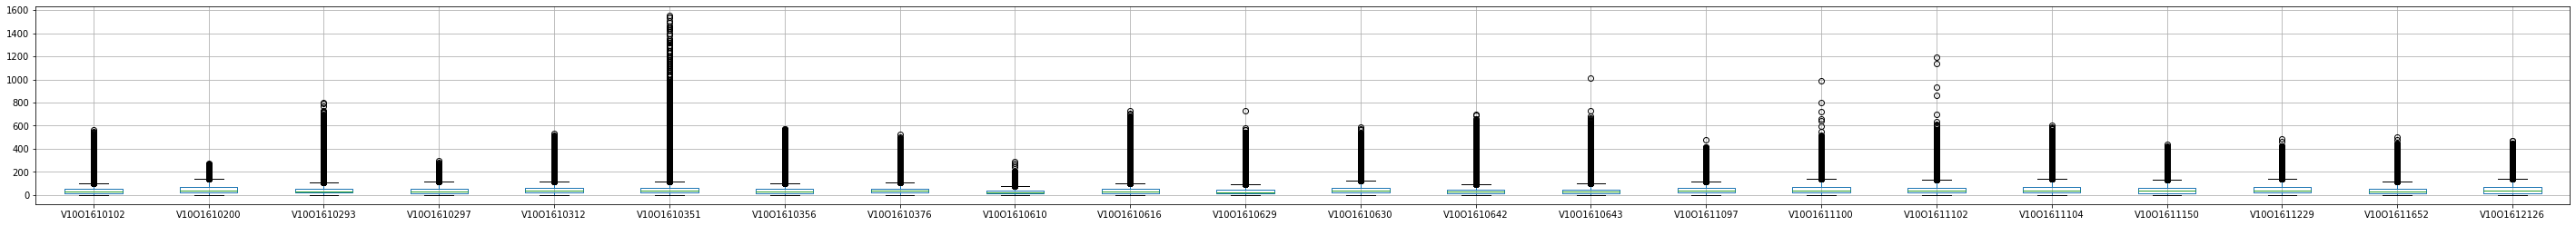

In [10]:
#이상치 처리 후 
plt.rcParams["figure.figsize"] = (50,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 
nowonstation.boxplot()

2. 시간 당 미세먼지 평균 농도 

In [11]:
nowonstation = nowonstation.reset_index()
nowonstation['hour'] = pd.to_datetime(nowonstation['tm']).dt.hour
nowonstation

serial,index,tm,date,time,pm,V10O1610102,V10O1610200,V10O1610293,V10O1610297,V10O1610312,...,V10O1610643,V10O1611097,V10O1611100,V10O1611102,V10O1611104,V10O1611150,V10O1611229,V10O1611652,V10O1612126,hour
0,0,2018-04-01 05:00:00,2018-04-01,05:00:00,pm10,NaN,60.0,62.0,66.0,49.0,...,27.0,66.0,51.0,56.0,78.0,75.0,61.0,56.0,70.0,5
1,1,2018-04-01 05:00:00,2018-04-01,05:00:00,pm25,NaN,34.0,35.0,38.0,24.0,...,13.0,38.0,29.0,32.0,45.0,43.0,34.0,32.0,35.0,5
2,2,2018-04-01 05:01:00,2018-04-01,05:01:00,pm10,NaN,63.0,62.0,72.0,54.0,...,21.0,55.0,97.0,65.0,79.0,57.0,39.0,29.0,1.0,5
3,3,2018-04-01 05:01:00,2018-04-01,05:01:00,pm25,NaN,36.0,35.0,41.0,27.0,...,10.0,31.0,56.0,37.0,45.0,33.0,22.0,16.0,1.0,5
4,4,2018-04-01 05:02:00,2018-04-01,05:02:00,pm10,NaN,49.0,56.0,64.0,59.0,...,23.0,41.0,33.0,54.0,58.0,74.0,51.0,49.0,71.0,5
5,5,2018-04-01 05:02:00,2018-04-01,05:02:00,pm25,NaN,28.0,32.0,37.0,30.0,...,11.0,23.0,19.0,31.0,33.0,42.0,29.0,28.0,36.0,5
6,6,2018-04-01 05:03:00,2018-04-01,05:03:00,pm10,NaN,73.0,59.0,72.0,59.0,...,28.0,40.0,44.0,64.0,85.0,67.0,62.0,57.0,60.0,5
7,7,2018-04-01 05:03:00,2018-04-01,05:03:00,pm25,NaN,42.0,34.0,41.0,30.0,...,14.0,23.0,25.0,37.0,49.0,38.0,35.0,33.0,30.0,5
8,8,2018-04-01 05:04:00,2018-04-01,05:04:00,pm10,NaN,72.0,59.0,68.0,69.0,...,32.0,65.0,50.0,29.0,59.0,63.0,63.0,37.0,76.0,5
9,9,2018-04-01 05:04:00,2018-04-01,05:04:00,pm25,NaN,41.0,34.0,39.0,35.0,...,16.0,37.0,28.0,16.0,34.0,36.0,35.0,21.0,38.0,5


In [12]:
nowonstation_hour = nowonstation.groupby(['date','hour','pm']).mean()
nowonstation_hour

serial                 index  V10O1610102  V10O1610200  V10O1610293  \
date       hour pm                                                    
2018-04-01 5    pm10      59          NaN    68.600000    61.983333   
                pm25      60          NaN    38.283333    34.533333   
           6    pm10     179          NaN    68.816667    61.600000   
                pm25     180          NaN    38.166667    34.116667   
           7    pm10     299          NaN    69.050000    64.550000   
...                      ...          ...          ...          ...   
2019-03-31 21   pm25  831900    18.083333          NaN    18.416667   
           22   pm10  832019    27.150000          NaN    28.816667   
                pm25  832020    19.150000          NaN    20.350000   
           23   pm10  832139    28.016667          NaN    31.050000   
                pm25  832140    18.100000          NaN    20.083333   

serial                V10O1610297  V10O1610312  V10O1610351  V10O1610356  \
date       hour pm                                                         
2018-04-01 5    pm10    67.533333    54.383333          NaN    40.433333   
                pm25    37.733333    27.866667          NaN    16.683333   
           6    pm10    69.566667    56.600000          NaN    54.266667   
                pm25    38.566667    29.383333          NaN    22.133333   
           7    pm10    69.050000    57.750000          NaN    55.550000   
...                           ...          ...          ...          ...   
2019-03-31 21   pm25          NaN    19.950000    15.216667    11.583333   
           22   pm10          NaN    26.500000    22.033333    21.966667   
                pm25          NaN    18.700000    15.400000     9.866667   
           23   pm10          NaN    26.533333    22.716667    23.766667   
                pm25          NaN    17.133333    14.650000    10.916667   

serial                V10O1610376  V10O1610610  ...  V10O1610642  V10O1610643  \
date       hour pm                              ...                             
2018-04-01 5    pm10    57.300000    36.033333  ...    45.350000    31.966667   
                pm25    31.933333    18.933333  ...    23.966667    16.816667   
           6    pm10    60.783333    42.633333  ...    50.816667    37.450000   
                pm25    33.483333    23.416667  ...    27.900000    20.500000   
           7    pm10    62.233333    37.400000  ...    46.150000    34.166667   
...                           ...          ...  ...          ...          ...   
2019-03-31 21   pm25    18.316667          NaN  ...    19.533333    14.400000   
           22   pm10    24.216667          NaN  ...    26.800000    18.983333   
                pm25    17.033333          NaN  ...    18.916667    13.283333   
           23   pm10    27.683333          NaN  ...    29.900000    21.400000   
                pm25    17.916667          NaN  ...    19.316667    13.683333   

serial                V10O1611097  V10O1611100  V10O1611102  V10O1611104  \
date       hour pm                                                         
2018-04-01 5    pm10    52.233333    65.750000    51.233333    60.550000   
                pm25    29.083333    36.666667    28.383333    33.783333   
           6    pm10    56.366667    73.816667    53.816667    62.450000   
                pm25    31.150000    40.900000    29.800000    34.666667   
           7    pm10    53.350000    76.700000    61.216667    64.066667   
...                           ...          ...          ...          ...   
2019-03-31 21   pm25    20.033333    18.233333    17.066667    18.883333   
           22   pm10    27.500000    25.366667    23.433333    28.050000   
                pm25    19.300000    17.900000    16.600000    19.883333   
           23   pm10    27.033333    26.900000    24.850000    27.933333   
                pm25    17.466667    17.450000    16.066667    18.083333   

serial                V10O1611150  V10O16112

3. 미세먼지 클래스 분류 [0(좋음),1(보통),2(나쁨),3(매우나쁨)]

In [13]:
#pm 10 classification
nowonstation_hour = nowonstation_hour.reset_index(level = [0,1,2])
pm10 = nowonstation_hour.loc[nowonstation_hour['pm']=='pm10']
pm10.drop(['pm'], axis='columns', inplace=True)
pm10 = pm10.set_index(['date', 'hour'])

pm10_max = pd.DataFrame(pm10.T.stack(0).stack()).reset_index()
pm10_max = pm10_max[pm10_max['serial']!='index']
pm10_max.columns = ['serial','date','hour','pm10'] 
pm10_max_2= pm10_max  #뒤에서 쓰려고 저장
pm10_max = pm10_max.groupby(['serial','date']).max()

pm10_max['pm10_class'] = 1  #default 값 1(보통)
pm10_max 

a10 = pm10_max.reset_index(level=[0,1])
a10.loc[a10['pm10']< 31.0 , 'pm10_class'] = 0                           # 좋음(0): 0 < pm10 < 30
a10.loc[(a10['pm10']< 81.0) & (a10['pm10'] >= 31.0), 'pm10_class'] = 1    # 보통(1) :31 < pm10 < 80
a10.loc[(a10['pm10']< 151.0) & (a10['pm10']>= 81.0) , 'pm10_class'] = 2   # 나쁨(2): 81 < pm10 < 150
a10.loc[a10['pm10']>= 151.0 , 'pm10_class'] = 3                         # 매우나쁨(3): pm10 >= 151
a10

C:\Users\user\Anaconda3\envs\finance\lib\site-packages\pandas\core\frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,serial,date,hour,pm10,pm10_class
0,V10O1610102,2018-05-07,23,95.615710,2
1,V10O1610102,2018-05-10,23,102.316667,2
2,V10O1610102,2018-05-11,23,158.500000,3
3,V10O1610102,2018-05-12,23,89.000000,2
4,V10O1610102,2018-05-13,23,54.283333,1
5,V10O1610102,2018-05-14,23,124.933333,2
6,V10O1610102,2018-05-15,23,145.233333,2
7,V10O1610102,2018-05-16,23,68.716667,1
8,V10O1610102,2018-05-17,23,30.583333,0
9,V10O1610102,2018-05-18,23,16.866667,0


In [14]:
nowonstation_hour

serial,date,hour,pm,index,V10O1610102,V10O1610200,V10O1610293,V10O1610297,V10O1610312,V10O1610351,...,V10O1610642,V10O1610643,V10O1611097,V10O1611100,V10O1611102,V10O1611104,V10O1611150,V10O1611229,V10O1611652,V10O1612126
0,2018-04-01,5,pm10,59,NaN,68.600000,61.983333,67.533333,54.383333,NaN,...,45.350000,31.966667,52.233333,65.750000,51.233333,60.550000,65.733333,62.816667,51.000000,74.866667
1,2018-04-01,5,pm25,60,NaN,38.283333,34.533333,37.733333,27.866667,NaN,...,23.966667,16.816667,29.083333,36.666667,28.383333,33.783333,36.716667,34.283333,28.366667,39.583333
2,2018-04-01,6,pm10,179,NaN,68.816667,61.600000,69.566667,56.600000,NaN,...,50.816667,37.450000,56.366667,73.816667,53.816667,62.450000,65.000000,71.800000,49.466667,79.650000
3,2018-04-01,6,pm25,180,NaN,38.166667,34.116667,38.566667,29.383333,NaN,...,27.900000,20.500000,31.150000,40.900000,29.800000,34.666667,35.916667,41.000000,27.316667,43.566667
4,2018-04-01,7,pm10,299,NaN,69.050000,64.550000,69.050000,57.750000,NaN,...,46.150000,34.166667,53.350000,76.700000,61.216667,64.066667,65.216667,79.816667,58.066667,81.933333
5,2018-04-01,7,pm25,300,NaN,40.316667,37.583333,40.300000,28.600000,NaN,...,23.516667,17.383333,31.050000,44.900000,35.550000,37.300000,38.083333,51.416667,33.800000,41.816667
6,2018-04-01,8,pm10,419,NaN,71.000000,71.716667,72.050000,58.816667,NaN,...,62.833333,51.966667,54.016667,74.216667,66.700000,67.683333,70.983333,61.866667,61.300000,83.850000
7,2018-04-01,8,pm25,420,NaN,42.550000,43.000000,43.233333,28.850000,NaN,...,32.316667,26.450000,32.366667,44.333333,39.616667,40.700000,42.683333,35.900000,36.666667,43.333333
8,2018-04-01,9,pm10,539,NaN,77.933333,77.916667,79.950000,66.950000,NaN,...,66.150000,51.500000,61.166667,87.033333,64.033333,73.283333,78.000000,64.783333,70.466667,95.933333
9,2018-04-01,9,pm25,540,NaN,46.450000,46.466667,47.800000,31.816667,NaN,...,30.466667,23.650000,36.233333,51.916667,37.866667,43.333333,46.283333,32.750000,41.766667,44.483333


In [15]:
#pm25 classification

# jongstation_hour = jongstation_hour.reset_index()
pm25 = nowonstation_hour.loc[nowonstation_hour['pm']=='pm25']
pm25.drop(['pm'], axis='columns', inplace=True)
pm25 = pm25.set_index(['date', 'hour'])
del pm25['index']
pm25_max = pd.DataFrame(pm25.T.stack(0).stack()).reset_index()
pm25_max_2= pm25_max #뒤에서 쓰려고 저장
pm25_max = pm25_max.groupby(['serial','date']).max() # 일별 최대값을 그날의 대표값으로 지정
pm25_max.columns = ['hour','pm25']  

pm25_max['pm25_class'] = 1  # class =1(보통)
# pm25_max.drop(['index', 'date'], axis='rows', inplace=True)

a25 = pm25_max.reset_index(level=[0,1])
a25.loc[a25['pm25']< 16.0 , 'pm25_class'] = 0
a25.loc[(a25['pm25']< 36.0) & (a25['pm25'] >= 16.0), 'pm25_class'] = 1
a25.loc[(a25['pm25']< 76.0) & (a25['pm25'] >= 36.0) , 'pm25_class'] = 2
a25.loc[a25['pm25']>= 76.0 , 'pm25_class'] = 3
a25 = a25.iloc[:,3:]
a25

,pm25,pm25_class
0,43.463026,2
1,66.500000,2
2,93.716667,3
3,52.916667,2
4,43.550000,2
5,85.266667,3
6,120.716667,3
7,45.183333,2
8,17.150000,1
9,6.066667,0


In [16]:
a1025 = [a10,a25]
pm_max = pd.concat(a1025, axis=1)
del pm_max['hour'] 
pm_max

,serial,date,pm10,pm10_class,pm25,pm25_class
0,V10O1610102,2018-05-07,95.615710,2,43.463026,2
1,V10O1610102,2018-05-10,102.316667,2,66.500000,2
2,V10O1610102,2018-05-11,158.500000,3,93.716667,3
3,V10O1610102,2018-05-12,89.000000,2,52.916667,2
4,V10O1610102,2018-05-13,54.283333,1,43.550000,2
5,V10O1610102,2018-05-14,124.933333,2,85.266667,3
6,V10O1610102,2018-05-15,145.233333,2,120.716667,3
7,V10O1610102,2018-05-16,68.716667,1,45.183333,2
8,V10O1610102,2018-05-17,30.583333,0,17.150000,1
9,V10O1610102,2018-05-18,16.866667,0,6.066667,0


In [17]:
# pm10과 pm25중 더 안좋은것을 기준으로 그날의 pm class 결정 
pm_max.loc[pm_max['pm10_class']< pm_max['pm25_class'] , 'pm_class'] = pm_max['pm25_class']
pm_max.loc[pm_max['pm10_class']< pm_max['pm25_class'] , 'pm_class_info'] ='pm25'

pm_max.loc[pm_max['pm10_class']>= pm_max['pm25_class'] , 'pm_class'] = pm_max['pm10_class']
pm_max.loc[pm_max['pm10_class']>= pm_max['pm25_class'] , 'pm_class_info'] ='pm10'

pm_max['pm10_class'] = pm_max['pm10_class'].astype('int').astype('category')
pm_max['pm25_class'] = pm_max['pm25_class'].astype('int').astype('category')
pm_max['pm_class'] = pm_max['pm_class'].astype('int')
pm_max['pm_class_info'] = pm_max['pm_class_info'].astype('category')
pm_max

,serial,date,pm10,pm10_class,pm25,pm25_class,pm_class,pm_class_info
0,V10O1610102,2018-05-07,95.615710,2,43.463026,2,2,pm10
1,V10O1610102,2018-05-10,102.316667,2,66.500000,2,2,pm10
2,V10O1610102,2018-05-11,158.500000,3,93.716667,3,3,pm10
3,V10O1610102,2018-05-12,89.000000,2,52.916667,2,2,pm10
4,V10O1610102,2018-05-13,54.283333,1,43.550000,2,2,pm25
5,V10O1610102,2018-05-14,124.933333,2,85.266667,3,3,pm25
6,V10O1610102,2018-05-15,145.233333,2,120.716667,3,3,pm25
7,V10O1610102,2018-05-16,68.716667,1,45.183333,2,2,pm25
8,V10O1610102,2018-05-17,30.583333,0,17.150000,1,1,pm25
9,V10O1610102,2018-05-18,16.866667,0,6.066667,0,0,pm10


In [18]:
pm_max.to_csv("./nowon_day_class.csv")

In [19]:
#pm10시간당 평균농도
pm10_max_2 
pm10_max_2.columns =['serial', 'date', 'hour', 'pm10']
pm10_max_2 

,serial,date,hour,pm10
6935,V10O1610102,2018-05-07,17,73.880435
6936,V10O1610102,2018-05-07,18,78.341304
6937,V10O1610102,2018-05-07,19,85.384783
6938,V10O1610102,2018-05-07,20,92.428261
6939,V10O1610102,2018-05-07,21,95.615710
6940,V10O1610102,2018-05-07,22,80.892216
6941,V10O1610102,2018-05-07,23,72.269461
6942,V10O1610102,2018-05-10,5,37.900000
6943,V10O1610102,2018-05-10,6,34.450000
6944,V10O1610102,2018-05-10,7,49.550000


In [20]:
#pm10이 150이상인 날
pm150 = pm10_max_2[pm10_max_2['pm10']>150].reset_index(drop=True)
del pm150['pm10']
pm150

,serial,date,hour
0,V10O1610102,2018-05-11,15
1,V10O1610102,2018-10-15,20
2,V10O1610102,2018-11-06,13
3,V10O1610102,2018-11-06,14
4,V10O1610102,2018-11-06,19
5,V10O1610102,2018-11-06,20
6,V10O1610102,2018-11-11,12
7,V10O1610102,2018-11-27,18
8,V10O1610102,2018-11-27,19
9,V10O1610102,2018-11-27,20


In [21]:
# '두시간 지속' 조건 적용 1 (한시간만 기준치 넘은 날짜 제외)
hour_cnt = pd.DataFrame(pm150.groupby([pm150['serial'],pm150['date']], axis=0).count()['hour']) # 일별 기준치 넘은 hour의 횟수
hour_cnt = hour_cnt[hour_cnt>1] 
hour_cnt =hour_cnt.dropna()
hour_cnt= hour_cnt.reset_index()
hour_cnt.columns=['serial', 'date', 'hour_cnt']
hour_cnt

,serial,date,hour_cnt
0,V10O1610102,2018-11-06,4.0
1,V10O1610102,2018-11-27,6.0
2,V10O1610102,2018-11-28,5.0
3,V10O1610102,2018-11-29,2.0
4,V10O1610102,2019-01-05,2.0
5,V10O1610102,2019-01-12,4.0
6,V10O1610102,2019-01-13,12.0
7,V10O1610102,2019-01-14,19.0
8,V10O1610102,2019-01-15,10.0
9,V10O1610102,2019-02-07,2.0


In [22]:
over_pm10 = pd.merge(hour_cnt, pm150, how='left')
over_pm10 = over_pm10.set_index(['serial','date','hour_cnt','hour'])
over_pm10

Empty DataFrame
Columns: []
Index: [(V10O1610102, 2018-11-06 00:00:00, 4.0, 13), (V10O1610102, 2018-11-06 00:00:00, 4.0, 14), (V10O1610102, 2018-11-06 00:00:00, 4.0, 19), (V10O1610102, 2018-11-06 00:00:00, 4.0, 20), (V10O1610102, 2018-11-27 00:00:00, 6.0, 18), (V10O1610102, 2018-11-27 00:00:00, 6.0, 19), (V10O1610102, 2018-11-27 00:00:00, 6.0, 20), (V10O1610102, 2018-11-27 00:00:00, 6.0, 21), (V10O1610102, 2018-11-27 00:00:00, 6.0, 22), (V10O1610102, 2018-11-27 00:00:00, 6.0, 23), (V10O1610102, 2018-11-28 00:00:00, 5.0, 5), (V10O1610102, 2018-11-28 00:00:00, 5.0, 6), (V10O1610102, 2018-11-28 00:00:00, 5.0, 7), (V10O1610102, 2018-11-28 00:00:00, 5.0, 8), (V10O1610102, 2018-11-28 00:00:00, 5.0, 9), (V10O1610102, 2018-11-29 00:00:00, 2.0, 15), (V10O1610102, 2018-11-29 00:00:00, 2.0, 16), (V10O1610102, 2019-01-05 00:00:00, 2.0, 5), (V10O1610102, 2019-01-05 00:00:00, 2.0, 6), (V10O1610102, 2019-01-12 00:00:00, 4.0, 10), (V10O1610102, 2019-01-12 00:00:00, 4.0, 11), (V10O1610102, 2019-01-12 00:00:00, 4.0, 12), (V10O1610102, 2019-01-12 00:00:00, 4.0, 13), (V10O1610102, 2019-01-13 00:00:00, 12.0, 10), (V10O1610102, 2019-01-13 00:00:00, 12.0, 11), (V10O1610102, 2019-01-13 00:00:00, 12.0, 12), (V10O1610102, 2019-01-13 00:00:00, 12.0, 13), (V10O1610102, 2019-01-13 00:00:00, 12.0, 14), (V10O1610102, 2019-01-13 00:00:00, 12.0, 17), (V10O1610102, 2019-01-13 00:00:00, 12.0, 18), (V10O1610102, 2019-01-13 00:00:00, 12.0, 19), (V10O1610102, 2019-01-13 00:00:00, 12.0, 20), (V10O1610102, 2019-01-13 00:00:00, 12.0, 21), (V10O1610102, 2019-01-13 00:00:00, 12.0, 22), (V10O1610102, 2019-01-13 00:00:00, 12.0, 23), (V10O1610102, 2019-01-14 00:00:00, 19.0, 5), (V10O1610102, 2019-01-14 00:00:00, 19.0, 6), (V10O1610102, 2019-01-14 00:00:00, 19.0, 7), (V10O1610102, 2019-01-14 00:00:00, 19.0, 8), (V10O1610102, 2019-01-14 00:00:00, 19.0, 9), (V10O1610102, 2019-01-14 00:00:00, 19.0, 10), (V10O1610102, 2019-01-14 00:00:00, 19.0, 11), (V10O1610102, 2019-01-14 00:00:00, 19.0, 12), (V10O1610102, 2019-01-14 00:00:00, 19.0, 13), (V10O1610102, 2019-01-14 00:00:00, 19.0, 14), (V10O1610102, 2019-01-14 00:00:00, 19.0, 15), (V10O1610102, 2019-01-14 00:00:00, 19.0, 16), (V10O1610102, 2019-01-14 00:00:00, 19.0, 17), (V10O1610102, 2019-01-14 00:00:00, 19.0, 18), (V10O1610102, 2019-01-14 00:00:00, 19.0, 19), (V10O1610102, 2019-01-14 00:00:00, 19.0, 20), (V10O1610102, 2019-01-14 00:00:00, 19.0, 21), (V10O1610102, 2019-01-14 00:00:00, 19.0, 22), (V10O1610102, 2019-01-14 00:00:00, 19.0, 23), (V10O1610102, 2019-01-15 00:00:00, 10.0, 5), (V10O1610102, 2019-01-15 00:00:00, 10.0, 6), (V10O1610102, 2019-01-15 00:00:00, 10.0, 7), (V10O1610102, 2019-01-15 00:00:00, 10.0, 8), (V10O1610102, 2019-01-15 00:00:00, 10.0, 9), (V10O1610102, 2019-01-15 00:00:00, 10.0, 10), (V10O1610102, 2019-01-15 00:00:00, 10.0, 11), (V10O1610102, 2019-01-15 00:00:00, 10.0, 12), (V10O1610102, 2019-01-15 00:00:00, 10.0, 13), (V10O1610102, 2019-01-15 00:00:00, 10.0, 14), (V10O1610102, 2019-02-07 00:00:00, 2.0, 5), (V10O1610102, 2019-02-07 00:00:00, 2.0, 6), (V10O1610102, 2019-02-20 00:00:00, 5.0, 19), (V10O1610102, 2019-02-20 00:00:00, 5.0, 20), (V10O1610102, 2019-02-20 00:00:00, 5.0, 21), (V10O1610102, 2019-02-20 00:00:00, 5.0, 22), (V10O1610102, 2019-02-20 00:00:00, 5.0, 23), (V10O1610102, 2019-02-21 00:00:00, 9.0, 5), (V10O1610102, 2019-02-21 00:00:00, 9.0, 6), (V10O1610102, 2019-02-21 00:00:00, 9.0, 7), (V10O1610102, 2019-02-21 00:00:00, 9.0, 8), (V10O1610102, 2019-02-21 00:00:00, 9.0, 9), (V10O1610102, 2019-02-21 00:00:00, 9.0, 10), (V10O1610102, 2019-02-21 00:00:00, 9.0, 13), (V10O1610102, 2019-02-21 00:00:00, 9.0, 14), (V10O1610102, 2019-02-21 00:00:00, 9.0, 18), (V10O1610102, 2019-02-22 00:00:00, 2.0, 9), (V10O1610102, 2019-02-22 00:00:00, 2.0, 11), (V10O1610102, 2019-02-25 00:00:00, 9.0, 5), (V10O1610102, 2019-02-25 00:00:00, 9.0, 6), (V10O1610102, 2019-02-25 00:00:00, 9.0, 7), (V10O1610102, 2019-02-25 00:00:00, 9.0, 8), (V10O1610102, 2019-02-25 00:00:00, 9.0, 9), (V10O1610102, 2019-02-25 00:00:00, 9.0

In [23]:
# '두시간 지속' 조건 적용 2 (연속된 시간)
over_pm10 = over_pm10.reset_index()
over_pm10['hour_sub'] = over_pm10['hour'] - over_pm10['hour'].shift(1) #시간차
over_pm10 = over_pm10[over_pm10['hour_sub']==1] #연속 
over_pm10 =over_pm10.set_index(['serial','date','hour_cnt','hour'])
over_pm10

hour_sub
serial      date       hour_cnt hour          
V10O1610102 2018-11-06 4.0      14         1.0
                                20         1.0
            2018-11-27 6.0      19         1.0
                                20         1.0
                                21         1.0
...                                        ...
V10O1612126 2019-03-06 17.0     19         1.0
                                20         1.0
                                21         1.0
                                22         1.0
                                23         1.0

[3324 rows x 1 columns]

In [24]:
##### pm10 기준치 초과로 재난문자 울린 day 뽑기
over_pm10 = over_pm10.reset_index()
pm10_msg_day= list(set(over_pm10['date'].dt.date)) # 재난문자 울린 day 목록
pm10_msg_day = pd.DataFrame(sorted(pm10_msg_day))
pm10_msg_day.columns=['date']
# pm10_msg_day['msg_10']= 1
pm10_msg_day

,date
0,2018-04-06
1,2018-04-11
2,2018-04-15
3,2018-04-18
4,2018-04-19
5,2018-04-20
6,2018-04-21
7,2018-04-27
8,2018-04-30
9,2018-05-01


In [25]:
# pm25시간당 평균농도
pm25_max_2 = pm25_max_2.reset_index(drop =True)
pm25_max_2 = pm25_max_2.rename(columns={0:'pm25'})
pm25_max_2

,serial,date,hour,pm25
0,V10O1610102,2018-05-07,17,24.717391
1,V10O1610102,2018-05-07,18,28.352174
2,V10O1610102,2018-05-07,19,34.091304
3,V10O1610102,2018-05-07,20,39.830435
4,V10O1610102,2018-05-07,21,43.463026
5,V10O1610102,2018-05-07,22,36.564371
6,V10O1610102,2018-05-07,23,31.714072
7,V10O1610102,2018-05-10,5,19.466667
8,V10O1610102,2018-05-10,6,17.533333
9,V10O1610102,2018-05-10,7,27.583333


In [26]:
#pm25 75이상인 날
pm75 = pm25_max_2[pm25_max_2['pm25']>75].reset_index(drop=True)
pm75

,serial,date,hour,pm25
0,V10O1610102,2018-05-11,5,88.133333
1,V10O1610102,2018-05-11,6,81.733333
2,V10O1610102,2018-05-11,8,80.816667
3,V10O1610102,2018-05-11,9,80.100000
4,V10O1610102,2018-05-11,12,93.716667
5,V10O1610102,2018-05-11,13,77.916667
6,V10O1610102,2018-05-11,14,81.266667
7,V10O1610102,2018-05-11,15,78.700000
8,V10O1610102,2018-05-11,16,77.900000
9,V10O1610102,2018-05-11,17,79.583333


In [27]:
# '두시간 지속' 조건 적용 1(한시간만 기준치 넘은 날짜 제외)
hour_cnt = pd.DataFrame(pm75.groupby([pm75['serial'],pm75['date']], axis=0).count()['hour']) # 일별 기준치 넘은 hour의 횟수
hour_cnt = hour_cnt[hour_cnt>1] # 한시간 제외
hour_cnt =hour_cnt.dropna()
hour_cnt= hour_cnt.reset_index()
hour_cnt.columns=['serial', 'date', 'hour_cnt']
hour_cnt

,serial,date,hour_cnt
0,V10O1610102,2018-05-11,10.0
1,V10O1610102,2018-05-14,5.0
2,V10O1610102,2018-05-15,4.0
3,V10O1610102,2018-10-14,4.0
4,V10O1610102,2018-10-15,6.0
5,V10O1610102,2018-10-16,6.0
6,V10O1610102,2018-10-22,4.0
7,V10O1610102,2018-11-06,12.0
8,V10O1610102,2018-11-10,7.0
9,V10O1610102,2018-11-11,5.0


In [28]:
over_pm25 = pd.merge(hour_cnt, pm75, how='left')
del over_pm25['pm25']
# over_pm25 = over_pm10.set_index(['serial','date','hour_cnt','hour'])
over_pm25

,serial,date,hour_cnt,hour
0,V10O1610102,2018-05-11,10.0,5
1,V10O1610102,2018-05-11,10.0,6
2,V10O1610102,2018-05-11,10.0,8
3,V10O1610102,2018-05-11,10.0,9
4,V10O1610102,2018-05-11,10.0,12
5,V10O1610102,2018-05-11,10.0,13
6,V10O1610102,2018-05-11,10.0,14
7,V10O1610102,2018-05-11,10.0,15
8,V10O1610102,2018-05-11,10.0,16
9,V10O1610102,2018-05-11,10.0,17


In [29]:
# '두시간 지속' 조건 적용 2 (연속된 두시간)
over_pm25 = over_pm25.reset_index()
over_pm25['hour_sub'] = over_pm25['hour'] - over_pm25['hour'].shift(1) 
over_pm25 = over_pm25[over_pm25['hour_sub']==1] #연속 
over_pm25 =over_pm25.set_index(['serial','date','hour_cnt','hour'])
over_pm25

index  hour_sub
serial      date       hour_cnt hour                 
V10O1610102 2018-05-11 10.0     6         1       1.0
                                9         3       1.0
                                13        5       1.0
                                14        6       1.0
                                15        7       1.0
...                                     ...       ...
V10O1612126 2019-03-27 7.0      9      7785       1.0
                                10     7786       1.0
                                22     7788       1.0
                                23     7789       1.0
            2019-03-28 2.0      6      7791       1.0

[6425 rows x 2 columns]

In [30]:
# pm25 기준치 초과로 재난문자 울린 day
over_pm25 = over_pm25.reset_index()
pm25_msg_day= list(set(over_pm25['date'].dt.date)) # 재난문자 울린 day 목록
pm25_msg_day = pd.DataFrame(sorted(pm25_msg_day))
pm25_msg_day.columns=['date']
pm25_msg_day['msg_25'] =1
pm25_msg_day

,date,msg_25
0,2018-04-06,1
1,2018-04-11,1
2,2018-04-19,1
3,2018-04-20,1
4,2018-04-21,1
5,2018-04-26,1
6,2018-04-27,1
7,2018-04-28,1
8,2018-04-29,1
9,2018-04-30,1


In [31]:
#pm10, pm25 경보 문자 온 날 
msg_day = pd.merge(pm10_msg_day, pm25_msg_day, on= 'date', how='outer')
msg_day['date'] = pd.to_datetime(msg_day['date'])
msg_day

,date,msg_25
0,2018-04-06,1.0
1,2018-04-11,1.0
2,2018-04-15,NaN
3,2018-04-18,NaN
4,2018-04-19,1.0
5,2018-04-20,1.0
6,2018-04-21,1.0
7,2018-04-27,1.0
8,2018-04-30,1.0
9,2018-05-01,1.0


In [32]:
# pm 총 월별 재난문자 횟수 뽑기(한시간평균, 경보문자 발령 day 수 count, 한달치 합계)
pm_msg_day = pd.DataFrame()
pm_msg_day['month'] = pd.to_datetime(msg_day['date']).dt.month
pm_msg_day['year'] = pd.to_datetime(msg_day['date']).dt.year
pm_msg_day['cnt']=1
msg_cnt = pm_msg_day.groupby(['year','month']).sum()
msg_cnt

cnt
year month     
2018 4       12
     5        9
     6        3
     7        3
     10       9
     11      12
     12      10
2019 1       29
     2       27
     3       16

In [33]:
final_nowon = pd.merge(pm_max, msg_day, how='left', on='date')
# final_jongro.isna().any() #결측치 확인 
final_nowon['msg_10'] = final_nowon['msg_10'].fillna(0)
final_nowon['msg_25'] = final_nowon['msg_25'].fillna(0)

cols =['serial', 'date', 'pm10', 'pm10_class', 'msg_10', 'pm25',
       'pm25_class','msg_25', 'pm_class', 'pm_class_info']
final_nowon= final_nowon[cols]

final_nowon['msg_10'] = final_nowon['msg_10'].astype(int)
final_nowon['msg_25'] = final_nowon['msg_25'].astype(int)
final_nowon['pm_class'] = final_nowon['pm_class'].astype(int)
final_nowon['pm_class_info'] = final_nowon['pm_class_info']
final_nowon

KeyError: 'msg_10'

# 최종본
final_nowon.to_pickle("./final_nowon.pickle")

In [34]:
############### 추가코드 1. 스테이션 별 365 맞추기 
nowon = pd.read_pickle("./final_nowon.pickle") #편의상 final_nowon을 nowon이라 함
nowon = nowon[['serial', 'date','pm10','pm25']]

# serial별로 모든 날짜 다 있는 컬럼 만들기 
date = pd.date_range(start='20180401', end='20190331')
date = pd.DataFrame(date) 
date = date.rename(columns={0:'date'})
print(len(date))
date

365


,date
0,2018-04-01
1,2018-04-02
2,2018-04-03
3,2018-04-04
4,2018-04-05
5,2018-04-06
6,2018-04-07
7,2018-04-08
8,2018-04-09
9,2018-04-10


In [35]:
station= list(set(nowon['serial']))
print(station)

df1 = pd.DataFrame(columns=['serial', 'date'])
for i in station:
    date['serial'] = i 
    df2 = date
    df1= pd.concat((df1, df2), axis=0)
date = df1

###확인 
date.groupby('serial').count()
date

['V10O1610376', 'V10O1611104', 'V10O1610312', 'V10O1610102', 'V10O1610629', 'V10O1610630', 'V10O1611097', 'V10O1610297', 'V10O1610616', 'V10O1610643', 'V10O1611229', 'V10O1610610', 'V10O1610351', 'V10O1610293', 'V10O1611100', 'V10O1610642', 'V10O1611102', 'V10O1611652', 'V10O1610200', 'V10O1610356', 'V10O1612126', 'V10O1611150']


C:\Users\user\Anaconda3\envs\finance\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,date,serial
0,2018-04-01,V10O1610376
1,2018-04-02,V10O1610376
2,2018-04-03,V10O1610376
3,2018-04-04,V10O1610376
4,2018-04-05,V10O1610376
5,2018-04-06,V10O1610376
6,2018-04-07,V10O1610376
7,2018-04-08,V10O1610376
8,2018-04-09,V10O1610376
9,2018-04-10,V10O1610376


In [36]:
# outer 조인으로 스테이션별 365 맞추기(Nan값 맨 밑으로 가기에 sort해줌->날짜 순서대로)
nowon = pd.merge(nowon, date, how='outer').sort_values('date')
nowon

nowon.groupby('serial').count() # date 숫자 365 확인

,date,pm10,pm25
serial,,,
V10O1610102,365,304,304
V10O1610200,365,75,75
V10O1610293,365,344,344
V10O1610297,365,80,80
V10O1610312,365,202,202
V10O1610351,365,184,184
V10O1610356,365,229,229
V10O1610376,365,344,344
V10O1610610,365,93,93


In [37]:
# 날짜별 미세먼지 구평균
nowon_mean = nowon.groupby(['date']).mean().round(1)
nowon_mean

,pm10,pm25
date,,
2018-04-01,84.1,50.2
2018-04-02,81.3,36.2
2018-04-03,93.5,41.2
2018-04-04,14.4,7.9
2018-04-05,33.9,8.3
2018-04-06,218.7,86.2
2018-04-07,64.0,35.4
2018-04-08,43.0,22.6
2018-04-09,65.3,43.0


#### 날짜별 미세먼지 구평균 피클파일 저장 ★
nowon_mean.to_pickle("./nowon_mean.pickle")

In [38]:
# pm10_class
nowon_mean.loc[nowon_mean['pm10']< 31.0 , 'pm10_class'] = 0                           # 좋음(0): 0 < pm10 < 30
nowon_mean.loc[(nowon_mean['pm10']< 81.0) & (nowon_mean['pm10'] >= 31.0), 'pm10_class'] = 1    # 보통(1) :31 < pm10 < 80
nowon_mean.loc[(nowon_mean['pm10']< 151.0) & (nowon_mean['pm10']>= 81.0) , 'pm10_class'] = 2   # 나쁨(2): 81 < pm10 < 150
nowon_mean.loc[nowon_mean['pm10']>= 151.0 , 'pm10_class'] = 3                         # 매우나쁨(3): pm10 >= 151

# pm25_class
nowon_mean.loc[nowon_mean['pm25']< 16.0 , 'pm25_class'] = 0
nowon_mean.loc[(nowon_mean['pm25']< 36.0) & (nowon_mean['pm25'] >= 16.0), 'pm25_class'] = 1
nowon_mean.loc[(nowon_mean['pm25']< 76.0) & (nowon_mean['pm25'] >= 36.0) , 'pm25_class'] = 2
nowon_mean.loc[nowon_mean['pm25']>= 76.0 , 'pm25_class'] = 3

# pm_class(pm10과 pm25중 더 안좋은 것)
nowon_mean.loc[nowon_mean['pm10_class']< nowon_mean['pm25_class'] , 'pm_class'] = nowon_mean['pm25_class']
nowon_mean.loc[nowon_mean['pm10_class']>= nowon_mean['pm25_class'] , 'pm_class'] = nowon_mean['pm10_class']

# pm_class_info
nowon_mean.loc[nowon_mean['pm10_class']< nowon_mean['pm25_class'] , 'pm_class_info'] ='pm25'
nowon_mean.loc[nowon_mean['pm10_class']>= nowon_mean['pm25_class'] , 'pm_class_info'] ='pm10'

#
nowon_mean['pm10_class'] = nowon_mean['pm10_class'].astype('int')
nowon_mean['pm25_class'] = nowon_mean['pm25_class'].astype('int')
nowon_mean['pm_class'] = nowon_mean['pm_class'].astype('int')
# nowon_mean['pm_class_info'] = nowon_mean['pm_class_info'].astype('category')

nowon_mean

,pm10,pm25,pm10_class,pm25_class,pm_class,pm_class_info
date,,,,,,
2018-04-01,84.1,50.2,2,2,2,pm10
2018-04-02,81.3,36.2,2,2,2,pm10
2018-04-03,93.5,41.2,2,2,2,pm10
2018-04-04,14.4,7.9,0,0,0,pm10
2018-04-05,33.9,8.3,1,0,1,pm10
2018-04-06,218.7,86.2,3,3,3,pm10
2018-04-07,64.0,35.4,1,1,1,pm10
2018-04-08,43.0,22.6,1,1,1,pm10
2018-04-09,65.3,43.0,1,2,2,pm25


In [39]:
nowon_mean.isna().sum()

pm10             0
pm25             0
pm10_class       0
pm25_class       0
pm_class         0
pm_class_info    0
dtype: int64

In [40]:
# pm10, pm25 NaN값을 해당날짜의 구 평균으로 채우기 
df1 = nowon[nowon["pm10"].isnull()==True]
df2 = nowon_mean

print(len(df1), len(df2))
df = pd.merge(df1, df2, on='date' , how='left')

df = df.drop(df.columns[[2,3,6,7,8,9]], axis='columns')
df = df.rename(columns={'pm10_y':'pm10', 'pm25_y':'pm25'})
df

2071 365


,serial,date,pm10,pm25
0,V10O1610351,2018-04-01,84.1,50.2
1,V10O1610102,2018-04-01,84.1,50.2
2,V10O1610102,2018-04-02,81.3,36.2
3,V10O1610351,2018-04-02,81.3,36.2
4,V10O1610102,2018-04-03,93.5,41.2
5,V10O1610351,2018-04-03,93.5,41.2
6,V10O1610102,2018-04-04,14.4,7.9
7,V10O1610351,2018-04-04,14.4,7.9
8,V10O1610351,2018-04-05,33.9,8.3
9,V10O1610102,2018-04-05,33.9,8.3


In [41]:
# nowon전체 데이터와 합치기 (merge)
df_sum = df.groupby(['date', 'serial'])['pm10','pm25'].sum().reset_index()
nowon = pd.merge(nowon, df_sum, on=['date', 'serial'], how='left')

In [42]:
#pm10_x(원래데이터) 와 pm10_y(구평균으로 채운 NaN값) 합친 새로운 칼럼 생성 
nowon['pm10']= nowon['pm10_x'].fillna(0)+ nowon['pm10_y'].fillna(0)
nowon['pm25']= nowon['pm25_x'].fillna(0) + nowon['pm25_y'].fillna(0)
del nowon['pm10_x'], nowon['pm25_x'], nowon['pm10_y'], nowon['pm25_y'] 
nowon

,serial,date,pm10,pm25
0,V10O1610200,2018-04-01,87.4,59.7
1,V10O1611229,2018-04-01,86.5,51.4
2,V10O1611104,2018-04-01,81.8,53.6
3,V10O1610630,2018-04-01,73.6,37.5
4,V10O1610351,2018-04-01,84.1,50.2
5,V10O1611652,2018-04-01,116.6,68.9
6,V10O1610297,2018-04-01,92.3,63.2
7,V10O1610356,2018-04-01,72.0,34.7
8,V10O1610293,2018-04-01,85.5,59.6
9,V10O1611150,2018-04-01,84.8,58.4


In [43]:
# pm10_class
nowon.loc[nowon['pm10']< 31.0 , 'pm10_class'] = 0                           # 좋음(0): 0 < pm10 < 30
nowon.loc[(nowon['pm10']< 81.0) & (nowon['pm10'] >= 31.0), 'pm10_class'] = 1    # 보통(1) :31 < pm10 < 80
nowon.loc[(nowon['pm10']< 151.0) & (nowon['pm10']>= 81.0) , 'pm10_class'] = 2   # 나쁨(2): 81 < pm10 < 150
nowon.loc[nowon['pm10']>= 151.0 , 'pm10_class'] = 3                         # 매우나쁨(3): pm10 >= 151

# pm25_class
nowon.loc[nowon['pm25']< 16.0 , 'pm25_class'] = 0
nowon.loc[(nowon['pm25']< 36.0) & (nowon['pm25'] >= 16.0), 'pm25_class'] = 1
nowon.loc[(nowon['pm25']< 76.0) & (nowon['pm25'] >= 36.0) , 'pm25_class'] = 2
nowon.loc[nowon['pm25']>= 76.0 , 'pm25_class'] = 3

# pm_class(pm10과 pm25중 더 안좋은 것)
nowon.loc[nowon['pm10_class']< nowon['pm25_class'] , 'pm_class'] = nowon['pm25_class']
nowon.loc[nowon['pm10_class']>= nowon['pm25_class'] , 'pm_class'] = nowon['pm10_class']

# pm_class_info
nowon.loc[nowon['pm10_class']< nowon['pm25_class'] , 'pm_class_info'] ='pm25'
nowon.loc[nowon['pm10_class']>= nowon['pm25_class'] , 'pm_class_info'] ='pm10'

nowon

,serial,date,pm10,pm25,pm10_class,pm25_class,pm_class,pm_class_info
0,V10O1610200,2018-04-01,87.4,59.7,2.0,2.0,2.0,pm10
1,V10O1611229,2018-04-01,86.5,51.4,2.0,2.0,2.0,pm10
2,V10O1611104,2018-04-01,81.8,53.6,2.0,2.0,2.0,pm10
3,V10O1610630,2018-04-01,73.6,37.5,1.0,2.0,2.0,pm25
4,V10O1610351,2018-04-01,84.1,50.2,2.0,2.0,2.0,pm10
5,V10O1611652,2018-04-01,116.6,68.9,2.0,2.0,2.0,pm10
6,V10O1610297,2018-04-01,92.3,63.2,2.0,2.0,2.0,pm10
7,V10O1610356,2018-04-01,72.0,34.7,1.0,1.0,1.0,pm10
8,V10O1610293,2018-04-01,85.5,59.6,2.0,2.0,2.0,pm10
9,V10O1611150,2018-04-01,84.8,58.4,2.0,2.0,2.0,pm10


In [44]:
# 스테이션 위치 넣어주기 
dic = {'V10O1610629':'공릉1동', 'V10O1610630':'공릉1동', 'V10O1611652':'공릉2동',
       'V10O1610642':'공릉2동', 'V10O1610356':'상계1동', 'V10O1610312':'상계2동', 
       'V10O1611100':'상계2동', 'V10O1610616':'상계2동', 'V10O1610200':'상계2동',
       'V10O1611150':'상계3.4동', 'V10O1610297':'상계5동', 'V10O1611102':'상계5동', 
       'V10O1610351':'상계6.7동', 'V10O1611104':'상계6.7동', 'V10O1610376':'상계6.7동',
       'V10O1610293':'상계10동', 'V10O1611229':'월계1동', 'V10O1610643':'월계3동',
       'V10O1611097':'중계2.3동','V10O1612126':'중계본동', 
       'V10O1610102':'하계1동', 'V10O1610610':'하계1동'}
nowon['행정동'] = nowon.replace({"serial": dic})['serial']

#칼럼 순서 조정
cols = nowon.columns.tolist()
cols = ['행정동','serial','date',
        'pm10','pm10_class',
        'pm25','pm25_class',
        'pm_class','pm_class_info']
nowon = nowon[cols]
nowon

#확인
# station = list(set(nowon['serial']))
print("스테이션 {0}개 * {1}일 = {2}".format(len(station), 365, len(station)*365))
print(len(nowon))
nowon

스테이션 22개 * 365일 = 8030
8030


,행정동,serial,date,pm10,pm10_class,pm25,pm25_class,pm_class,pm_class_info
0,상계2동,V10O1610200,2018-04-01,87.4,2.0,59.7,2.0,2.0,pm10
1,월계1동,V10O1611229,2018-04-01,86.5,2.0,51.4,2.0,2.0,pm10
2,상계6.7동,V10O1611104,2018-04-01,81.8,2.0,53.6,2.0,2.0,pm10
3,공릉1동,V10O1610630,2018-04-01,73.6,1.0,37.5,2.0,2.0,pm25
4,상계6.7동,V10O1610351,2018-04-01,84.1,2.0,50.2,2.0,2.0,pm10
5,공릉2동,V10O1611652,2018-04-01,116.6,2.0,68.9,2.0,2.0,pm10
6,상계5동,V10O1610297,2018-04-01,92.3,2.0,63.2,2.0,2.0,pm10
7,상계1동,V10O1610356,2018-04-01,72.0,1.0,34.7,1.0,1.0,pm10
8,상계10동,V10O1610293,2018-04-01,85.5,2.0,59.6,2.0,2.0,pm10
9,상계3.4동,V10O1611150,2018-04-01,84.8,2.0,58.4,2.0,2.0,pm10


nowon.to_pickle("./nowon_365.pickle")

In [45]:
n = pd.read_pickle("./nowon_365.pickle")
n.isna().sum()

행정동              0
serial           0
date             0
pm10             0
pm10_class       0
pm25             0
pm25_class       0
pm_class         0
pm_class_info    0
dtype: int64

In [ ]:
#################### 추가 코드